In [3]:
# Exercise 1
# 1.1
# As the classes are categorical, use one-hot encoding to represent the set of classes. 
# You will find this useful when developing the output layer of the neural network.
# Note that the dataset doesn't include data points from all grading levels, 
# but you may still need to create the one-hot encoding by 10 cols.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

data = pd.read_csv('winequality-white.csv')

encoder = OneHotEncoder(categories=[range(1, 11)], sparse=False)
encoded_labels = encoder.fit_transform(data[['quality']])
encoded_labels_df = pd.DataFrame(encoded_labels, columns=[f'quality_{i}' for i in range(1, 11)])
data = pd.concat([data.drop('quality', axis=1), encoded_labels_df], axis=1)

# 1.2
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-10])
scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns[:-10])
final_data = pd.concat([scaled_data_df, encoded_labels_df], axis=1)

final_data.to_csv('preprocessed_winequality_data.csv', index=False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 23)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 17)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 13)             │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │           140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058 (4.13 KB)

 Trainable params: 1,058 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1743 - loss: 0.7020 - val_accuracy: 0.1918 - val_loss: 0.1465
Epoch 2/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1792 - loss: 0.3896 - val_accuracy: 0.1918 - val_loss: 0.1444
Epoch 3/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.1912 - loss: 0.3865 - val_accuracy: 0.1918 - val_loss: 0.1437
Epoch 4/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.1799 - loss: 0.3933 - val_accuracy: 0.1918 - val_loss: 0.1439
Epoch 5/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.1775 - loss: 0.3942 - val_accuracy: 0.1918 - val_loss: 0.1425
Epoch 6/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.1901 - loss: 0.3864 - val_accuracy: 0.1918 - val_loss: 0.1431
Epoch 7/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.1814 - loss: 0.3916 - val_accuracy: 0.1918 - val_loss: 0.1420
Epoch 8/500
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.1850 - loss: 0.387

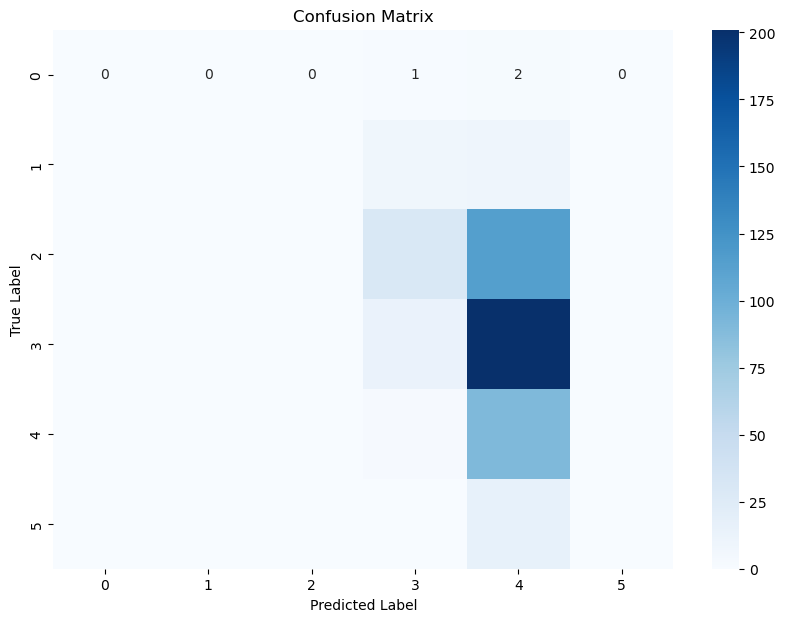

In [14]:
# Exercise 3
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import RandomOverSampler


# Load the data
data = pd.read_csv('preprocessed_winequality_data.csv')

# input data
X = data.iloc[:, :-10].values.astype(np.float32)

# output data
y = data.iloc[:, -10:].values.astype(np.float32)

# Compute class weights
y_labels = np.argmax(y, axis=1)  # Convert one-hot encoding to class labels
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_labels), y=y_labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Apply oversampling to balance classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build a model
model = keras.Sequential([
    keras.layers.Dense(23, activation='sigmoid', input_shape=(11,)),
    keras.layers.Dense(17, activation='sigmoid'),
    keras.layers.Dense(13, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile a model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.4),
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weight_dict)

# Evaluate the data
y_pred = model.predict(X_test)

y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

conf_matrx = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrx, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Exercise 4
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

data = pd.read_csv('preprocessed_winequality_data.csv')

X = data.iloc[:, :-10].values.astype(np.float32)

y = data.iloc[:, -10:].values.astype(np.float32)

kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Training fold {fold+1}...")

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = keras.Sequential([
        keras.layers.Dense(23, activation='sigmoid', input_shape=(11,)),
        keras.layers.Dense(17, activation='sigmoid'),
        keras.layers.Dense(13, activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.4),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f"Fold {fold+1} MSE: {mse:.4f}")

average_mse = np.mean(mse_scores)

print("\nFinal Results:")
print("MSE values for each fold:", mse_scores)
print(f"Overall Average MSE: {average_mse:.4f}")

Training fold 1...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 1 MSE: 0.0636
Training fold 2...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 2 MSE: 0.0671
Training fold 3...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 3 MSE: 0.0605
Training fold 4...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 4 MSE: 0.0670
Training fold 5...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 5 MSE: 0.0696
Training fold 6...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 6 MSE: 0.0606
Training fold 7...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 7 MSE: 0.0683
Training fold 8...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Fold 8 MSE: 0.0660
Training fold 9...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 9 MSE: 0.0607
Training fold 10...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Fold 10 MSE: 0.0676

Final Results:
MSE values for each fold: [0.06359987, 0.06713602, 0.060517024, 0.06702243, 0.069573365, 0.060612537, 0.06827153, 0.06600944, 0.060737234, 0.06755147]
Overall Average MSE: 0.0651


In [17]:
# Exercise 5
# Use random search
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random

data = pd.read_csv('preprocessed_winequality_data.csv')

X = data.iloc[:, :-10].values.astype(np.float32)

y = data.iloc[:, -10:].values.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

hidden_layer_sizes = [(20, 15, 10), (25, 18, 12), (30, 20, 15)]
learning_rates = [0.1, 0.2, 0.4, 0.5]
epochs_list = [100, 300, 500]

best_params = None
best_mse = float('inf')

for _ in range(10):
    # Choose parameter randomly
    hidden_layers = random.choice(hidden_layer_sizes)
    learning_rate = random.choice(learning_rates)
    epochs = random.choice(epochs_list)

    print(f"Testing with layers={hidden_layers}, lr={learning_rate}, epochs={epochs}...")

    model = keras.Sequential([
        keras.layers.Dense(hidden_layers[0], activation='sigmoid', input_shape=(11,)),
        keras.layers.Dense(hidden_layers[1], activation='sigmoid'),
        keras.layers.Dense(hidden_layers[2], activation='sigmoid'),
        keras.layers.Dense(10, activation='sigmoid')
    ])

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                  loss='mean_squared_error',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    print(f"MSE: {mse:.4f}")

    # Update the best parameter
    if mse < best_mse:
        best_mse = mse
        best_params = (hidden_layers, learning_rate, epochs)

print("\nBest Hyperparameters:")
print(f"Hidden Layers: {best_params[0]}")
print(f"Learning Rate: {best_params[1]}")
print(f"Epochs: {best_params[2]}")
print(f"Minimum MSE: {best_mse:.4f}")

Testing with layers=(20, 15, 10), lr=0.4, epochs=300...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 0.0682
Testing with layers=(30, 20, 15), lr=0.1, epochs=500...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 0.0682
Testing with layers=(20, 15, 10), lr=0.2, epochs=300...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 0.0682
Testing with layers=(20, 15, 10), lr=0.1, epochs=500...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 0.0682
Testing with layers=(20, 15, 10), lr=0.1, epochs=500...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 0.0682
Testing with layers=(20, 15, 10), lr=0.4, epochs=300...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 0.0683
Testing with layers=(25, 18, 12), lr=0.4, epochs=300...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 0.0682
Testing with layers=(25, 18, 12), lr=0.2, epochs=300...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE: 0.0682
Testing with layers=(20, 15, 10), lr=0.2, epochs=500...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 0.0682
Testing with layers=(25, 18, 12), lr=0.4, epochs=300...


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE: 0.0681

Best Hyperparameters:
Hidden Layers: (25, 18, 12)
Learning Rate: 0.4
Epochs: 300
Minimum MSE: 0.0681
